## Task 3

#### Employee turnover prediction

#### Objective: Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company

### Author: Aurobindo Parida

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\askap\Downloads\Employee_dataset.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

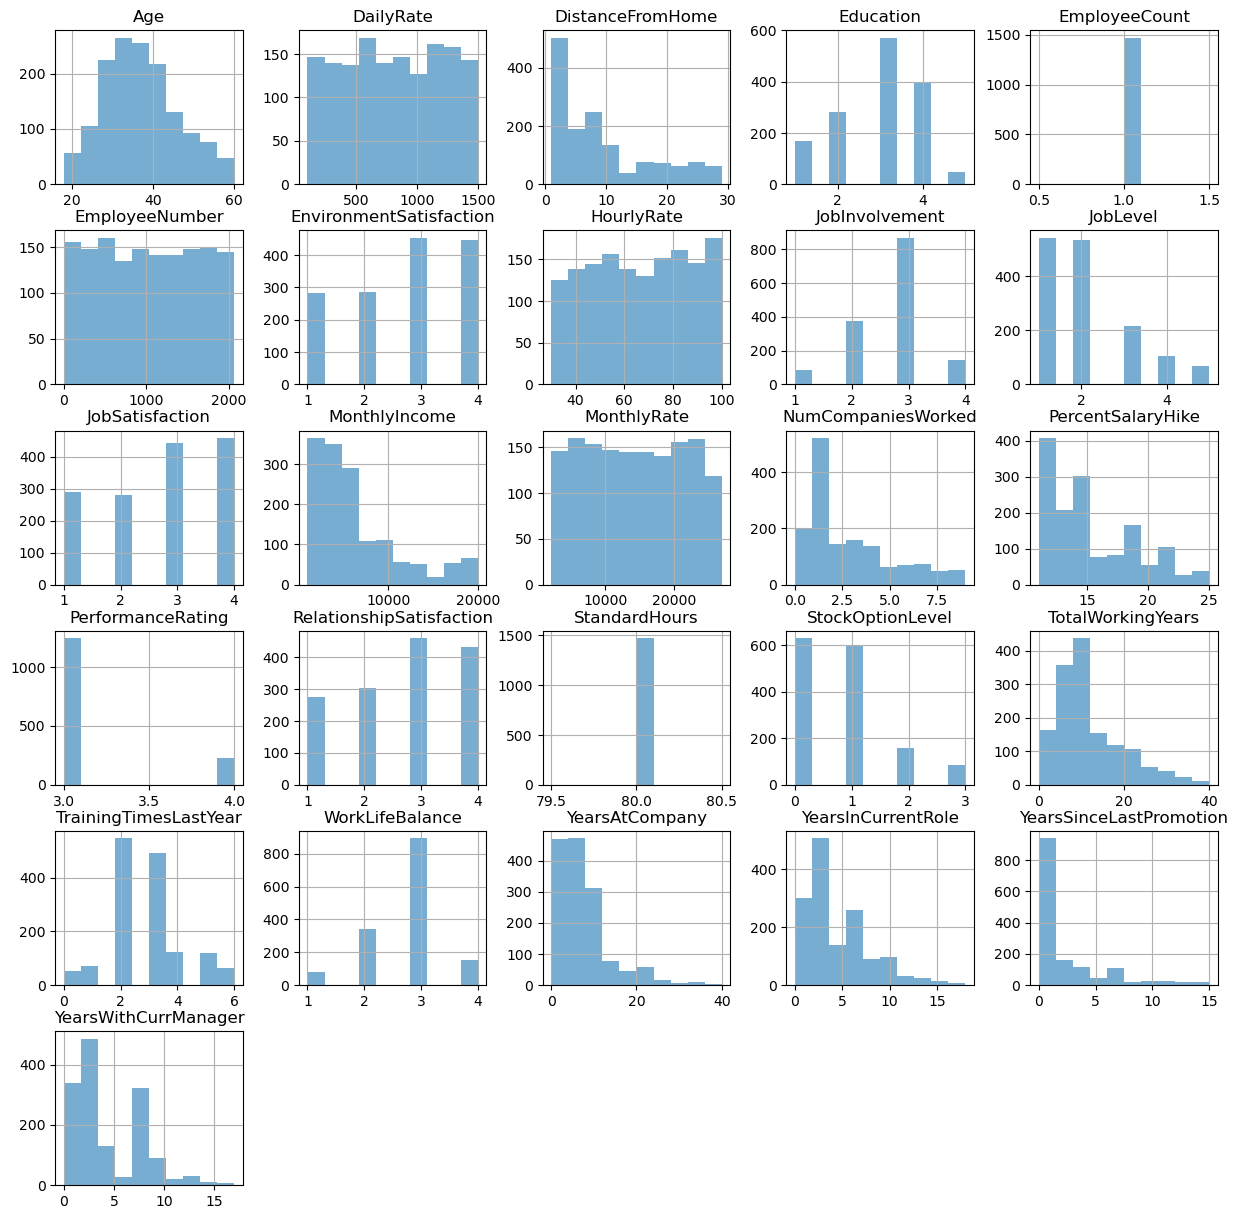

In [5]:
data.hist(figsize=(15,15),alpha=0.6)

In [6]:
# converting the categorical value to nominal
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


le.fit(data["Department"])
data["Department"] = le.transform(data["Department"])

le.fit(data["JobRole"])
data["JobRole"] = le.transform(data["JobRole"])

le.fit(data["Gender"])
data["Gender"] = le.transform(data["Gender"])

le.fit(data["BusinessTravel"])
data["BusinessTravel"] = le.transform(data["BusinessTravel"])

le.fit(data["EducationField"])
data["EducationField"] = le.transform(data["EducationField"])

le.fit(data["MaritalStatus"])
data["MaritalStatus"] = le.transform(data["MaritalStatus"])

le.fit(data["Over18"])
data["Over18"] = le.transform(data["Over18"])

In [9]:
# MinMaxScaler: This scales the data to a specific range, usually between 0 and 1. It's useful to preserve the shape of the original distribution.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["DistanceFromHome"]=scaler.fit_transform(data["DistanceFromHome"].values.reshape(-1, 1)).flatten()
data["MonthlyIncome"]=scaler.fit_transform(data["MonthlyIncome"].values.reshape(-1, 1)).flatten()
data["NumCompaniesWorked"]=scaler.fit_transform(data["NumCompaniesWorked"].values.reshape(-1, 1)).flatten()
data["PercentSalaryHike"]=scaler.fit_transform(data["PercentSalaryHike"].values.reshape(-1, 1)).flatten()
data["TotalWorkingYears"]=scaler.fit_transform(data["TotalWorkingYears"].values.reshape(-1, 1)).flatten()
data["YearsSinceLastPromotion"]=scaler.fit_transform(data["YearsSinceLastPromotion"].values.reshape(-1, 1)).flatten()

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.000000,2,1,1,1,...,1,80,0,0.200,0,1,6,4,0.000000,5
1,49,0,1,279,1,0.250000,1,1,1,2,...,4,80,1,0.250,3,3,10,7,0.066667,7
2,37,1,2,1373,1,0.035714,2,4,1,4,...,2,80,0,0.175,3,3,0,0,0.000000,0
3,33,0,1,1392,1,0.071429,4,1,1,5,...,3,80,0,0.200,3,3,8,7,0.200000,0
4,27,0,2,591,1,0.035714,1,3,1,7,...,4,80,1,0.150,3,3,2,2,0.133333,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int32  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [12]:
data=data[["Age","Attrition","Department","DistanceFromHome","EducationField","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MaritalStatus","MonthlyIncome","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","YearsSinceLastPromotion","TrainingTimesLastYear","WorkLifeBalance"]]

In [13]:
data.head()

,Age,Attrition,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsSinceLastPromotion,TrainingTimesLastYear,WorkLifeBalance
0,41,1,2,0.000000,1,2,94,3,2,4,...,0.888889,1,0.000000,3,1,0,0.200,0.000000,0,1
1,49,0,1,0.250000,1,3,61,2,2,2,...,0.111111,0,0.857143,4,4,1,0.250,0.066667,3,3
2,37,1,1,0.035714,4,4,92,2,1,3,...,0.666667,1,0.285714,3,2,0,0.175,0.000000,3,3
3,33,0,1,0.071429,1,4,56,3,1,3,...,0.111111,1,0.000000,3,3,0,0.200,0.200000,3,3
4,27,0,1,0.035714,3,1,40,3,1,2,...,1.000000,0,0.071429,3,4,1,0.150,0.133333,3,3


<Axes: >

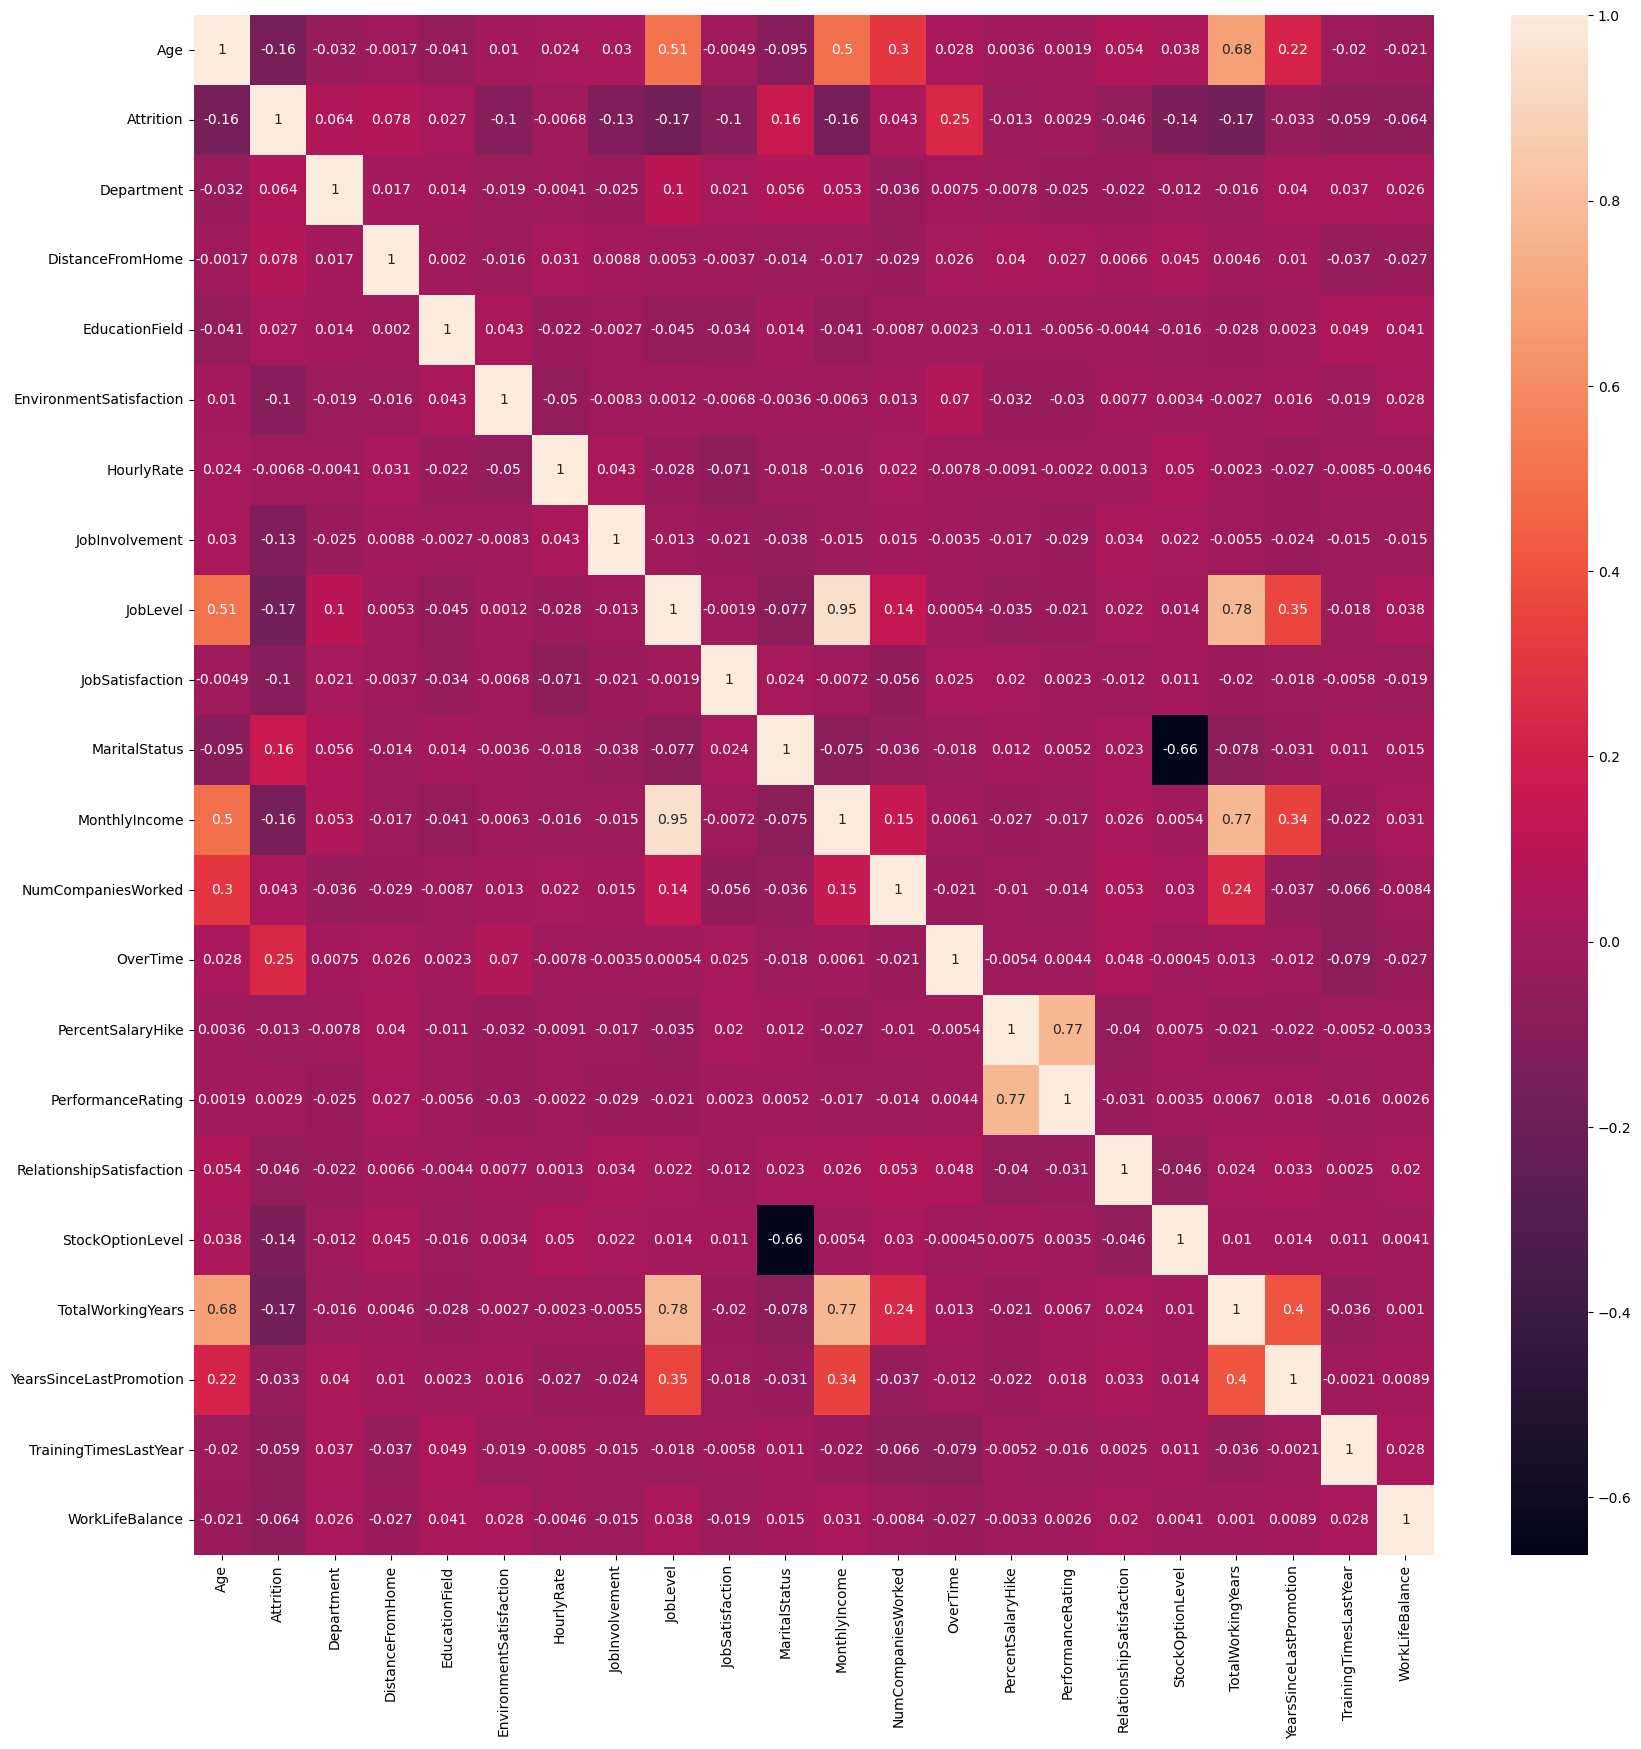

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations=data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,annot=True)

In [15]:
# since monthly income and job level are correlated with value 0.95 . hence dropping job level
data.drop(["JobLevel"],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   Department                1470 non-null   int32  
 3   DistanceFromHome          1470 non-null   float64
 4   EducationField            1470 non-null   int32  
 5   EnvironmentSatisfaction   1470 non-null   int64  
 6   HourlyRate                1470 non-null   int64  
 7   JobInvolvement            1470 non-null   int64  
 8   JobSatisfaction           1470 non-null   int64  
 9   MaritalStatus             1470 non-null   int32  
 10  MonthlyIncome             1470 non-null   float64
 11  NumCompaniesWorked        1470 non-null   float64
 12  OverTime                  1470 non-null   int64  
 13  PercentSalaryHike         1470 non-null   float64
 14  Performa

In [17]:
x=data.drop(["Attrition"],axis=1)
y=data["Attrition"]

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model_lr = LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1470, 20)
(1176, 20)
(294, 20)


In [22]:
model_lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
prediction = model_lr.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:

acc = accuracy_score(y_test,prediction)

print("Accuracy of the model: ",acc)

Accuracy of the model:  0.8639455782312925
